# set up


**setting up the js src in browser console **


```
var script = document.createElement('script');
script.src = "https://ajax.googleapis.com/ajax/libs/jquery/2.2.0/jquery.min.js"; document.getElementsByTagName('head')[0].appendChild(script);

```

**parsing the urls **

```
var urls = $('.rg_di .rg_meta').map(function() { return JSON.parse($(this).text()).ou; });

```


**Saving the parsed urls and downloads **


```
var textToSave = urls.toArray().join('\n');
var hiddenElement = document.createElement('a');
hiddenElement.href = 'data:attachment/text,' + encodeURI(textToSave);
hiddenElement.target = '_blank';
hiddenElement.download = 'urls.txt';
hiddenElement.click();
```

In [0]:
!mkdir rose

In [0]:
!rm -r rose

# Download images using python

In [0]:
from imutils import paths
import requests
import cv2
import os

In [0]:
rose_file_path = "urls.txt"
not_rose_file_path = "nr.txt"

op_rose_file_path = "rose/"
op_nt_rose_file_path = "not_rose/"

In [0]:
rows = open(rose_file_path).read().strip().split("\n")
total = 0

In [0]:
type(rows)

list

In [0]:
rows[:5]

['https://i.ytimg.com/vi/DFhJUk7LNT0/hqdefault.jpg',
 'https://images.unsplash.com/photo-1519058497187-7167f17c6daf?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&w=1000&q=80',
 'https://images-na.ssl-images-amazon.com/images/I/71etj1mmV9L._SX425_.jpg',
 'https://s3.amazonaws.com/site-files-prod/FiftyFlowers/Image/Product/Hot-Lady2-350_de950408.jpg',
 'https://s3.amazonaws.com/store-product-images/JGI169-M.jpg']

In [0]:
# downloding the images
for url in rows:
    try:
        # requesting image
        r = requests.get(url, timeout=60)
        
        # saving image
        p = os.path.join('rose', '{}.jpg'.format(total))
        with open(p, "wb") as f:
            f.write(r.content)
            
        # try to read using opencv
        try:
            image = cv2.imread(p)
            if image is None:
                os.remove(p)
            else:
                total += 1
        except:
            os.remove(p) # when image is corrupt delete directly
    except:
        print("download error ... skipping {}".format(p))

download error ... skipping rose/79.jpg
download error ... skipping rose/83.jpg
download error ... skipping rose/84.jpg
download error ... skipping rose/85.jpg
download error ... skipping rose/86.jpg


In [0]:
!unzip rose.zip -d rose/

Archive:  rose.zip
   creating: rose/rose/
  inflating: rose/rose/0.jpg         
  inflating: rose/rose/1.jpg         
  inflating: rose/rose/2.jpg         
  inflating: rose/rose/3.jpg         
  inflating: rose/rose/4.jpg         
  inflating: rose/rose/5.jpg         
  inflating: rose/rose/6.jpg         
  inflating: rose/rose/7.jpg         
  inflating: rose/rose/8.jpg         
  inflating: rose/rose/9.jpg         
  inflating: rose/rose/10.jpg        
  inflating: rose/rose/11.jpg        
  inflating: rose/rose/12.jpg        
  inflating: rose/rose/13.jpg        
  inflating: rose/rose/14.jpg        
  inflating: rose/rose/15.jpg        
  inflating: rose/rose/16.jpg        
  inflating: rose/rose/17.jpg        
  inflating: rose/rose/18.jpg        
  inflating: rose/rose/19.jpg        
  inflating: rose/rose/20.jpg        
  inflating: rose/rose/21.jpg        
  inflating: rose/rose/22.jpg        
  inflating: rose/rose/23.jpg        
  inflating: rose/rose/24.jpg        
  infla

In [0]:
!unzip not_rose.zip -d rose/

Archive:  not_rose.zip
   creating: rose/not_rose/
  inflating: rose/not_rose/0.jpg     
  inflating: rose/not_rose/1.jpg     
  inflating: rose/not_rose/2.jpg     
  inflating: rose/not_rose/3.jpg     
  inflating: rose/not_rose/4.jpg     
  inflating: rose/not_rose/5.jpg     
  inflating: rose/not_rose/8.jpg     
  inflating: rose/not_rose/9.jpg     
  inflating: rose/not_rose/10.jpg    
  inflating: rose/not_rose/11.jpg    
  inflating: rose/not_rose/12.jpg    
  inflating: rose/not_rose/13.jpg    
  inflating: rose/not_rose/14.jpg    
  inflating: rose/not_rose/15.jpg    
  inflating: rose/not_rose/16.jpg    
  inflating: rose/not_rose/17.jpg    
  inflating: rose/not_rose/18.jpg    
  inflating: rose/not_rose/19.jpg    
  inflating: rose/not_rose/20.jpg    
  inflating: rose/not_rose/21.jpg    
  inflating: rose/not_rose/22.jpg    
  inflating: rose/not_rose/23.jpg    
  inflating: rose/not_rose/24.jpg    
  inflating: rose/not_rose/25.jpg    
  inflating: rose/not_rose/26.jpg    

# GPU Test

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17104019343947594915
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 11716632091299743649
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 8773701108265266633
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14771804570
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8861072281785089840
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [2]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
import tensorflow as tf

In [5]:
%%time
with tf.device('/device:GPU:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)

with tf.Session() as sess:
    print (sess.run(c))

[[22. 28.]
 [49. 64.]]
CPU times: user 11.7 ms, sys: 5.66 ms, total: 17.3 ms
Wall time: 20.9 ms


In [6]:
%%time
with tf.device('/device:CPU:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)

with tf.Session() as sess:
    print (sess.run(c))

[[22. 28.]
 [49. 64.]]
CPU times: user 9.58 ms, sys: 2.14 ms, total: 11.7 ms
Wall time: 17 ms


# Using keras

In [0]:
!mkdir rose

In [0]:
!unzip rose -d rose/

In [0]:
!unzip not_rose.zip -d rose/

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

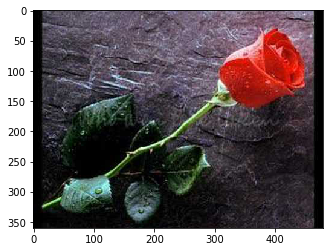

In [12]:
img = mpimg.imread('rose/rose/0.jpg')
imgplot = plt.imshow(img)
plt.show()

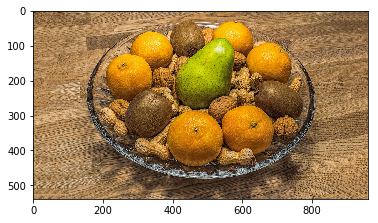

In [13]:
img = mpimg.imread('rose/not_rose/0.jpg')
imgplot = plt.imshow(img)
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

In [0]:
import matplotlib
matplotlib.use("Agg")

from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os

In [0]:
class LeNet:
  @staticmethod
  def build(width, height, depth, classes):
    inputShape = (height, width, depth)
    
    if K.image_data_format() == "channels_first":
      inputShape = (depth, height, width)
    
    model = Sequential()
    
    # first block of conv -> activation -> maxpool
    model.add(Conv2D(20, (5, 5), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # second block of conv -> activation -> maxpool
    model.add(Conv2D(50, (5, 5), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # FC layer
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation("relu"))
    
    # Classifier layer
    model.add(Dense(classes))
    model.add(Activation("softmax"))
    
    return model

In [0]:
epochs = 25 # epochs
init_lr = 1e-3 # learning rate
batch_size = 32 # batch_size

In [0]:
data = []
labels = []

In [19]:
image_paths = sorted(list(paths.list_images('rose/')))
image_paths[:5], image_paths[-5:]

(['rose/not_rose/0.jpg',
  'rose/not_rose/1.jpg',
  'rose/not_rose/10.jpg',
  'rose/not_rose/100.jpg',
  'rose/not_rose/101.jpg'],
 ['rose/rose/95.jpg',
  'rose/rose/96.jpg',
  'rose/rose/97.jpg',
  'rose/rose/98.jpg',
  'rose/rose/99.jpg'])

In [0]:
random.seed(0)
random.shuffle(image_paths)

In [21]:
image_paths[-1].split(os.path.sep)[-2]

'rose'

In [0]:
for image_path in image_paths:
  image = cv2.imread(image_path)
  image = cv2.resize(image, (28, 28))
  image = img_to_array(image)
  data.append(image)
  
  label = image_path.split(os.path.sep)[-2]
  label = 1 if label == 'rose' else 0
  labels.append(label)

In [23]:
len(data), len(labels)

(660, 660)

In [24]:
data = np.array(data, dtype="float") / 255.0  # scaling all images
labels = np.array(labels)

data.shape, labels.shape 

((660, 28, 28, 3), (660,))

In [25]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((495, 28, 28, 3), (165, 28, 28, 3), (495,), (165,))

In [26]:
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

y_train.shape, y_test.shape

((495, 2), (165, 2))

In [0]:
# data augmentation
aug = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

**Test run 1**

In [28]:
model = LeNet.build(width=28, height=28, depth=3, classes=2)
opt = Adam(lr=init_lr, decay=init_lr/epochs)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [30]:
model

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        1520      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
__________

In [32]:
# training model
H = model.fit_generator(aug.flow(x_train,y_train,batch_size=batch_size),validation_data=(x_test, y_test),steps_per_epoch=len(x_train) // batch_size,epochs=epochs,verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
 - 4s - loss: 0.6851 - acc: 0.5479 - val_loss: 0.6020 - val_acc: 0.7091
Epoch 2/25
 - 0s - loss: 0.5831 - acc: 0.6882 - val_loss: 0.4584 - val_acc: 0.8061
Epoch 3/25
 - 0s - loss: 0.5076 - acc: 0.7364 - val_loss: 0.3497 - val_acc: 0.8303
Epoch 4/25
 - 0s - loss: 0.4556 - acc: 0.7972 - val_loss: 0.3513 - val_acc: 0.8485
Epoch 5/25
 - 0s - loss: 0.4006 - acc: 0.8198 - val_loss: 0.3258 - val_acc: 0.8606
Epoch 6/25
 - 0s - loss: 0.4099 - acc: 0.8306 - val_loss: 0.3097 - val_acc: 0.8848
Epoch 7/25
 - 0s - loss: 0.4177 - acc: 0.8033 - val_loss: 0.3329 - val_acc: 0.8303
Epoch 8/25
 - 0s - loss: 0.3769 - acc: 0.8538 - val_loss: 0.3163 - val_acc: 0.8485
Epoch 9/25
 - 0s - loss: 0.3453 - acc: 0.8328 - val_loss: 0.2879 - val_acc: 0.8788
Epoch 10/25
 - 0s - loss: 0.3487 - acc: 0.8492 - val_loss: 0.2983 - val_acc: 0.8727
Epoch 11/25
 - 0s - loss: 0.3777 - acc: 0.8348 - val_loss: 0.2744 - val_acc: 0.8970
Epoch 12/25
 - 0s - loss: 0.3997 - ac

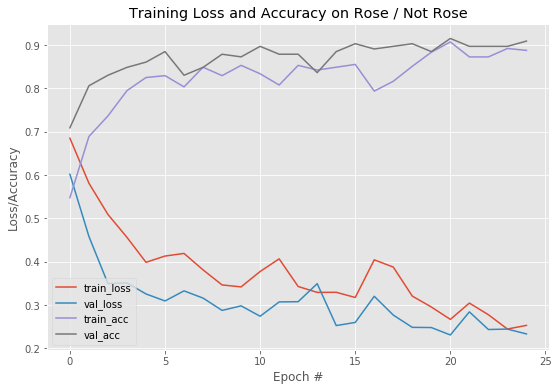

In [36]:
plt.style.use("ggplot")
plt.figure(figsize=(9, 6))
N = epochs

plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")

plt.title("Training Loss and Accuracy on Rose / Not Rose")
plt.xlabel('Epoch #')
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

**Test run 2**

In [0]:
epochs = 100
init_lr = 1e-3
batch_size = 32

In [0]:
model = LeNet.build(width=28, height=28, depth=3, classes=2)
opt = Adam(lr=init_lr, decay=init_lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [41]:
H = model.fit_generator(aug.flow(x_train,y_train,batch_size=batch_size),validation_data=(x_test, y_test),steps_per_epoch=len(x_train) // batch_size,epochs=epochs,verbose=2)

Epoch 1/100
 - 1s - loss: 0.7448 - acc: 0.5333 - val_loss: 0.6276 - val_acc: 0.7212
Epoch 2/100
 - 0s - loss: 0.5780 - acc: 0.7093 - val_loss: 0.4063 - val_acc: 0.8242
Epoch 3/100
 - 0s - loss: 0.4812 - acc: 0.7764 - val_loss: 0.3328 - val_acc: 0.8424
Epoch 4/100
 - 0s - loss: 0.3881 - acc: 0.8181 - val_loss: 0.3280 - val_acc: 0.8485
Epoch 5/100
 - 0s - loss: 0.4115 - acc: 0.8118 - val_loss: 0.2953 - val_acc: 0.8848
Epoch 6/100
 - 0s - loss: 0.4368 - acc: 0.8116 - val_loss: 0.4731 - val_acc: 0.7636
Epoch 7/100
 - 0s - loss: 0.4492 - acc: 0.7842 - val_loss: 0.3195 - val_acc: 0.8667
Epoch 8/100
 - 0s - loss: 0.4120 - acc: 0.8137 - val_loss: 0.3552 - val_acc: 0.8485
Epoch 9/100
 - 0s - loss: 0.3644 - acc: 0.8434 - val_loss: 0.3110 - val_acc: 0.8667
Epoch 10/100
 - 0s - loss: 0.3365 - acc: 0.8433 - val_loss: 0.2762 - val_acc: 0.8667
Epoch 11/100
 - 0s - loss: 0.3796 - acc: 0.8369 - val_loss: 0.2803 - val_acc: 0.8909
Epoch 12/100
 - 0s - loss: 0.3211 - acc: 0.8412 - val_loss: 0.3025 - val_a

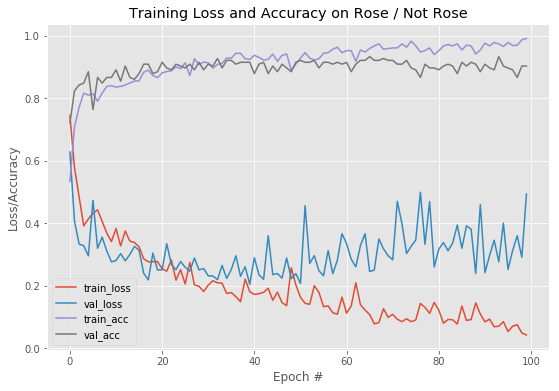

In [42]:
plt.style.use("ggplot")
plt.figure(figsize=(9, 6))
N = epochs

plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")

plt.title("Training Loss and Accuracy on Rose / Not Rose")
plt.xlabel('Epoch #')
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

First graph shows good learning as training accuracy and validation accuracy are closer to each other.

Second graph shows model overfitting as training accuracy and validation moves away from each other

**Evaluation**

In [0]:
import requests

In [0]:
eval_image_url = 'https://proxy.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.eo45hcBaWRYM_PzSAWKj-gHaE9%26pid%3DApi&f=1'

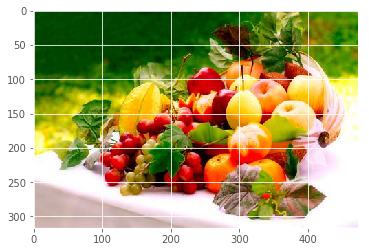

In [46]:
img = requests.get(eval_image_url, timeout=60)
with open('rose/eval1.jpg', "wb") as f:
  f.write(img.content)

img = mpimg.imread('rose/eval1.jpg')
imgplot = plt.imshow(img)
plt.show()

In [0]:
import cv2

In [0]:
image = cv2.imread('rose/eval1.jpg')
orig = image.copy()

In [0]:
# preprocessing

image = cv2.resize(image, (28, 28))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [50]:
image.shape

(1, 28, 28, 3)

In [0]:
(not_rose, rose) = model.predict(image)[0]

In [52]:
not_rose, rose

(0.99961555, 0.0003844374)

(1, 28, 28, 3)
1.3329079e-19 1.0


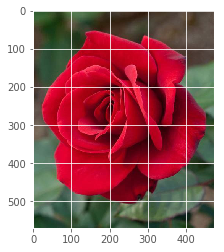

In [53]:
eval_image_url = 'https://proxy.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.zhkVxujDFT27vHWBrXVuDAHaI6%26pid%3DApi&f=1'
img = requests.get(eval_image_url, timeout=60)
with open('rose/eval2.jpg', "wb") as f:
  f.write(img.content)

img = mpimg.imread('rose/eval2.jpg')
imgplot = plt.imshow(img)
plt.show()

image = cv2.imread('rose/eval2.jpg')
orig = image.copy()
image = cv2.resize(image, (28, 28))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
print(image.shape)
(not_rose, rose) = model.predict(image)[0]
print(not_rose, rose)

**Model is able to predict the images correctly**


Still lets try with testing dataset  to check if model is overfit- **Test run 3**

In [55]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(495, 28, 28, 3) (165, 28, 28, 3) (495,) (165,)
(371, 28, 28, 3) (124, 28, 28, 3) (371,) (124,)


In [58]:
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)

print(y_train.shape, y_test.shape, y_val.shape)

# data augmentation
aug = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)
model = LeNet.build(width=28, height=28, depth=3, classes=2)
opt = Adam(lr=init_lr, decay=init_lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

(371, 2) (165, 2) (124, 2)


In [0]:
epochs = 50
batch_size = 32
init_lr = 1e-3

In [61]:
H = model.fit_generator(aug.flow(x_train,y_train,batch_size=batch_size),validation_data=(x_val, y_val),steps_per_epoch=len(x_train) // batch_size,epochs=epochs,verbose=2)

Epoch 1/50
 - 1s - loss: 0.7348 - acc: 0.5938 - val_loss: 0.6071 - val_acc: 0.7661
Epoch 2/50
 - 0s - loss: 0.6125 - acc: 0.6683 - val_loss: 0.5480 - val_acc: 0.7742
Epoch 3/50
 - 0s - loss: 0.5080 - acc: 0.7581 - val_loss: 0.4397 - val_acc: 0.8145
Epoch 4/50
 - 0s - loss: 0.4537 - acc: 0.7859 - val_loss: 0.4176 - val_acc: 0.8306
Epoch 5/50
 - 0s - loss: 0.4643 - acc: 0.7923 - val_loss: 0.3850 - val_acc: 0.8306
Epoch 6/50
 - 0s - loss: 0.4287 - acc: 0.7952 - val_loss: 0.3916 - val_acc: 0.8306
Epoch 7/50
 - 0s - loss: 0.4239 - acc: 0.7941 - val_loss: 0.3781 - val_acc: 0.8387
Epoch 8/50
 - 0s - loss: 0.4024 - acc: 0.8158 - val_loss: 0.3842 - val_acc: 0.8145
Epoch 9/50
 - 0s - loss: 0.3500 - acc: 0.8454 - val_loss: 0.3640 - val_acc: 0.8226
Epoch 10/50
 - 0s - loss: 0.3904 - acc: 0.7984 - val_loss: 0.3306 - val_acc: 0.8468
Epoch 11/50
 - 0s - loss: 0.3464 - acc: 0.8408 - val_loss: 0.4149 - val_acc: 0.8306
Epoch 12/50
 - 0s - loss: 0.3959 - acc: 0.8197 - val_loss: 0.3923 - val_acc: 0.8226
E

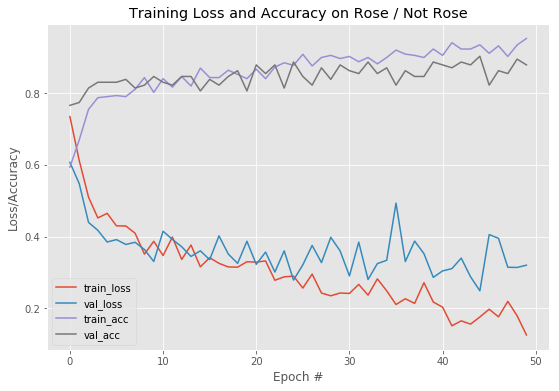

In [62]:
plt.style.use("ggplot")
plt.figure(figsize=(9, 6))
N = epochs

plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")

plt.title("Training Loss and Accuracy on Rose / Not Rose")
plt.xlabel('Epoch #')
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [63]:
model.evaluate(x_test, y_test)

165/165 [==============================] - 0s 191us/step


[0.2617072867737575, 0.9333333333333333]

on evaluation we got acc 93 % , using test dataset

# Deep CNN CIFAR - 10

In [0]:
from